In [1]:
%matplotlib inline

In [2]:
from pylab import *
from numpy import *

Question 1(a)

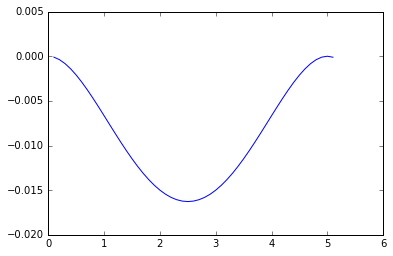

In [3]:
i = 0;
gamma = -0.01
L = 5
x = []
while i < 5:
    x.append(i+0.1)
    i = i+0.1   
y = []
for n in x:
    ynum = (1/24)*(gamma*L**2*n**2-2*gamma*L*n**3+gamma*n**4)
    y.append(ynum)
plot(x,y)

Question 1(b)

In [4]:
def solve_BVP (f,adir, aneu, bdir, bneu, m):
    #f is the function on the left, for this question, f will be zero
    #adir = (a,alpha1) is the dirichlet BC at a, so u(a) = alpha1
    #aneu = (a,alpha2) is the neumann BC at a, so u'(a) = alpha2
    #bdir = (b,beta1) is the dirichlet BC at b, so u(b) = beta1
    #bneu = (b,beta2) is the neumann BC at b, so u'(b) = beta2
    #m is the number of gridpoints used. 
    
    #Returns
    # It returns an array of the interior gridpoints and the U values at those interior grid points

    from scipy import sparse
    from scipy.sparse.linalg import spsolve
    import scipy.linalg
    

    a, alpha1 = adir
    a, alpha2 = aneu
    b, beta1 = bdir
    b, beta2 = bneu
   

    #calculate h
    h = (b-a)/(m+1)
    x = linspace(a,b,m+2)

    em = ones(m)
    em1 = ones(m-1)
    em2 = ones(m-2)
    A = sparse.diags([em2, -4*em1, 6*em, -4*em1, em2],[-2,-1,0,1,2], shape=(m,m)).toarray()
    A[0,0] = 2*h**3
    A[0,1] = (-1/2)*h**3
    A[0,2] = 0;
    A[m-1,m-1] = -2*h**3
    A[m-1,m-2] = (1/2)*h**3
    A[m-1,m-3] = 0
    
    A = A/(h**4)

    #Edit b
    xintpoints = linspace(a+h,b-h,m)
    b = f(xintpoints)
    b[0] = alpha2 +(3/(2*h))*alpha1
    b[1] = b[1] -alpha1/(h**4)
    b[m-2] = b[m-2] -beta1/(h**4)
    b[m-1] = beta2 -(3/(2*h))*beta1
    b = b.T
    
    print(A)
    print(b)
    #Solve the system
    uip = linalg.solve(A,b) 
   
    return xintpoints, uip, h

In [5]:
f = lambda x: -0.01 +0*x
a = 0; alpha1 = 0; alpha2 = 0;
b = 5; beta1 = 0; beta2 = 0;
adir = (a,alpha1)
aneu = (a,alpha2)
bdir = (b,beta1)
bneu = (b,beta2)
m = 100

[[  4.04000000e+01  -1.01000000e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -6.65986566e+05   9.98979850e+05  -6.65986566e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.66496642e+05  -6.65986566e+05   9.98979850e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   9.98979850e+05
   -6.65986566e+05   1.66496642e+05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -6.65986566e+05
    9.98979850e+05  -6.65986566e+05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.01000000e+01  -4.04000000e+01]]
[ 0.   -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.

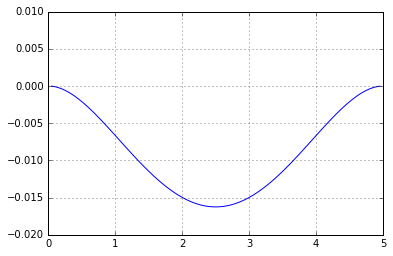

In [6]:
x,u,h = solve_BVP(f,adir, aneu, bdir, bneu, m)
plot(x, u, 'b')
ylim(-0.02, 0.01)
grid(True)

In [7]:
%matplotlib inline

[[  2.20000000e+01  -5.50000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.85640000e+04   8.78460000e+04  -5.85640000e+04   1.46410000e+04
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.46410000e+04  -5.85640000e+04   8.78460000e+04  -5.85640000e+04
    1.46410000e+04   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.46410000e+04  -5.85640000e+04   8.78460000e+04
   -5.85640000e+04   1.46410000e+04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.46410000e+04  -5.85640000e+04
    8.78460000e+04  -5.85640000e+04   1.46410000e+04   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.46410000e+04
   -5.85640000e+04   8.78460000e+04  -5.85640

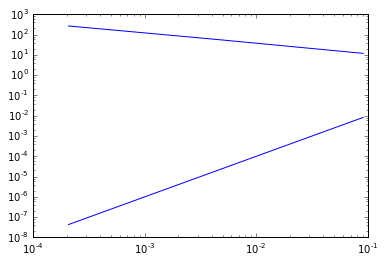

In [11]:
#To find the error:
error = []
mvals = []
hvals = []
i = 10
while i < 5000:
    mvals.append(i)
    x,u,h = solve_BVP(f,adir, aneu, bdir, bneu, i)
    hvals.append(h)
    u_true= lambda x:(1/24)*(gamma*L**2*x**2-2*gamma*L*x**3+gamma*x**4)
    utrue = u_true(x)
    err= norm(utrue-u)
    error.append(err)
    i = i+200

#print("u_true")
#print(u_true)
print("error")
print(error)
print("h")
print(hvals)
print("sizeh")
print(size(h))
print(size(error))
loglog(hvals,error, 'b')
loglog(hvals,array(hvals)**2)




In [9]:
f = lambda x: 120*x
a = 0; alpha1 = 2; alpha2 = 3;
b = 1; beta1 = 6; beta2 = 8;
adir = (a,alpha1)
aneu = (a,alpha2)
bdir = (b,beta1)
bneu = (b,beta2)
m = 10

[[  2.20000000e+01  -5.50000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.85640000e+04   8.78460000e+04  -5.85640000e+04   1.46410000e+04
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.46410000e+04  -5.85640000e+04   8.78460000e+04  -5.85640000e+04
    1.46410000e+04   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.46410000e+04  -5.85640000e+04   8.78460000e+04
   -5.85640000e+04   1.46410000e+04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.46410000e+04  -5.85640000e+04
    8.78460000e+04  -5.85640000e+04   1.46410000e+04   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.46410000e+04
   -5.85640000e+04   8.78460000e+04  -5.85640

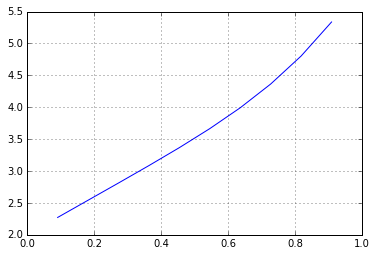

In [10]:
x,u,h = solve_BVP(f,adir, aneu, bdir, bneu, m)
plot(x, u, 'b')
grid(True)
print(h)